In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Read in the data\
df = pd.read_csv('adult.csv')
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
types = df.dtypes
names = list(df.columns)

In [4]:
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])

In [5]:
data = df.values
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(32560, 14)
(32560,)


In [7]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6512, 14)
(26048, 14)
(6512,)
(26048,)


# Classification

In [29]:
mse = Sequential([
    Dense(units=32, input_dim= X_train.shape[1], activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=8, activation="relu"),
    Dense(units=2, activation="softmax")
])
mse.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                480       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,162
Trainable params: 1,162
Non-trainable params: 0
_________________________________________________________________


In [30]:
mse.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 


In [31]:
history = mse.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    

Epoch 1/10
163/163 [==============================] - 1s 3ms/step - loss: 311.5108 - accuracy: 0.5784 - val_loss: 45.9461 - val_accuracy: 0.7728
Epoch 2/10
163/163 [==============================] - 0s 2ms/step - loss: 20.8330 - accuracy: 0.6896 - val_loss: 20.3889 - val_accuracy: 0.7882
Epoch 3/10
163/163 [==============================] - 0s 2ms/step - loss: 17.9443 - accuracy: 0.6919 - val_loss: 46.0444 - val_accuracy: 0.7721
Epoch 4/10
163/163 [==============================] - 0s 2ms/step - loss: 24.6470 - accuracy: 0.6896 - val_loss: 11.9400 - val_accuracy: 0.7713
Epoch 5/10
163/163 [==============================] - 0s 1ms/step - loss: 20.0288 - accuracy: 0.6957 - val_loss: 28.9998 - val_accuracy: 0.7813
Epoch 6/10
163/163 [==============================] - 0s 1ms/step - loss: 10.1089 - accuracy: 0.6996 - val_loss: 39.9865 - val_accuracy: 0.2456
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 15.2388 - accuracy: 0.6944 - val_loss: 24.1121 - val_accuracy

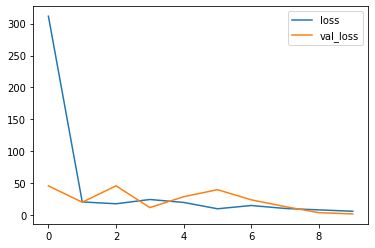

In [32]:
# Plot the loss and accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
    

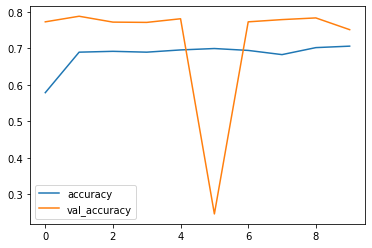

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
    

In [34]:
# Evaluate the model
score = mse.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
    

Test loss: 1.7430871725082397
Test accuracy: 0.77487713098526


In [35]:
# Predict the test data
y_pred = mse.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred.shape)
print(y_test.shape)
    

(26048, 2)
(26048,)


# Regression